<a href="https://colab.research.google.com/github/susanje/clusteringpractica/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [47]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import datetime, date
import numpy as np
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
%matplotlib inline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import math

In [301]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

In [101]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [29]:
df.shape #dimensionality

(7050, 16)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [31]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [32]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN



We can see that the last 4 rows do not have information, so it would be convenient to drop them, we also see that most of the columns have information in integers. On the other hand, it would also be convenient to convert the date column into datetime(Podemos observar que las ultimas 4 filas no poseen información por lo cual sería conveniente dropearlas, además observamos que la mayoria de las columnas tienen información en enteros. Por otro lado también seria convieniente convertir la columna fecha en datetime)

In [302]:
df['status_published'] = pd.DataFrame(data=df, columns=['status_published'])
df['status_published']=pd.to_datetime(df['status_published'],format='%m/%d/%Y %H:%M')

In [303]:
df['month'] = df['status_published'].apply(lambda x: x.month)
df['day'] = df['status_published'].apply(lambda x: x.day)
df['year'] = df['status_published'].apply(lambda x: x.year)
df['hour'] = df['status_published'].apply(lambda x: x.hour)
df['minute'] = df['status_published'].apply(lambda x: x.minute)

In [304]:
df.drop_duplicates()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,num_angrys,Column1,Column2,Column3,Column4,month,day,year,hour,minute
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,...,0,NaN,NaN,NaN,NaN,4,22,2018,6,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,...,0,NaN,NaN,NaN,NaN,4,21,2018,22,45
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,...,0,NaN,NaN,NaN,NaN,4,21,2018,6,17
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,...,0,NaN,NaN,NaN,NaN,4,21,2018,2,29
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,...,0,NaN,NaN,NaN,NaN,4,18,2018,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,...,0,NaN,NaN,NaN,NaN,9,24,2016,2,58
7046,7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,...,0,NaN,NaN,NaN,NaN,9,23,2016,11,19
7047,7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,...,0,NaN,NaN,NaN,NaN,9,21,2016,23,3
7048,7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,...,0,NaN,NaN,NaN,NaN,9,20,2016,0,43


In [305]:
df = df.drop(['Column1','Column2','Column3','Column4','status_id'],axis=1 )#drop de unnecessary columns

**EDA**

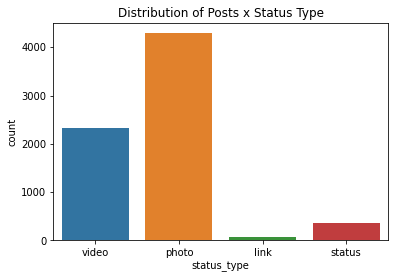

In [306]:
pl = sns.countplot(x=df["status_type"])
pl.set_title("Distribution of Posts x Status Type")
plt.show()

In [107]:
df.status_type.value_counts() #photo and video are de highest

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

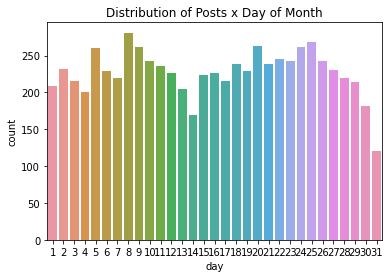

In [307]:
pl = sns.countplot(x=df["day"])
pl.set_title("Distribution of Posts x Day of Month")
plt.show() #the thirty one day maybe is lowest because no every month have it

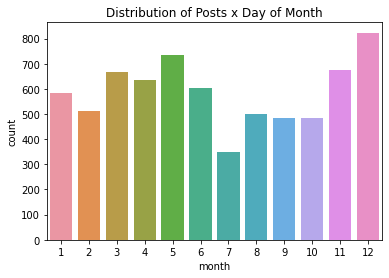

In [308]:
pl = sns.countplot(x=df["month"])
pl.set_title("Distribution of Posts x Day of Month")
plt.show() #july is the lowest

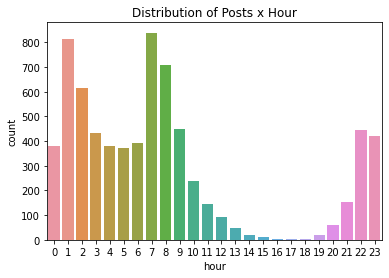

In [309]:
pl = sns.countplot(x=df["hour"])
pl.set_title("Distribution of Posts x Hour")
plt.show()#we can see the posts don't usually are posted around 13:00 and 19:00

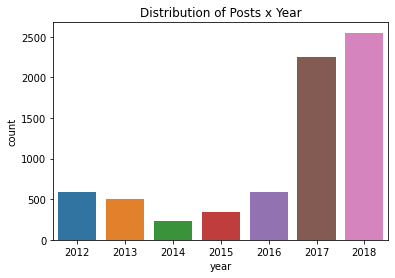

In [310]:
pl = sns.countplot(x=df["year"])
pl.set_title("Distribution of Posts x Year")
plt.show() #we can see 2017 & 2018 are the biggest years posted

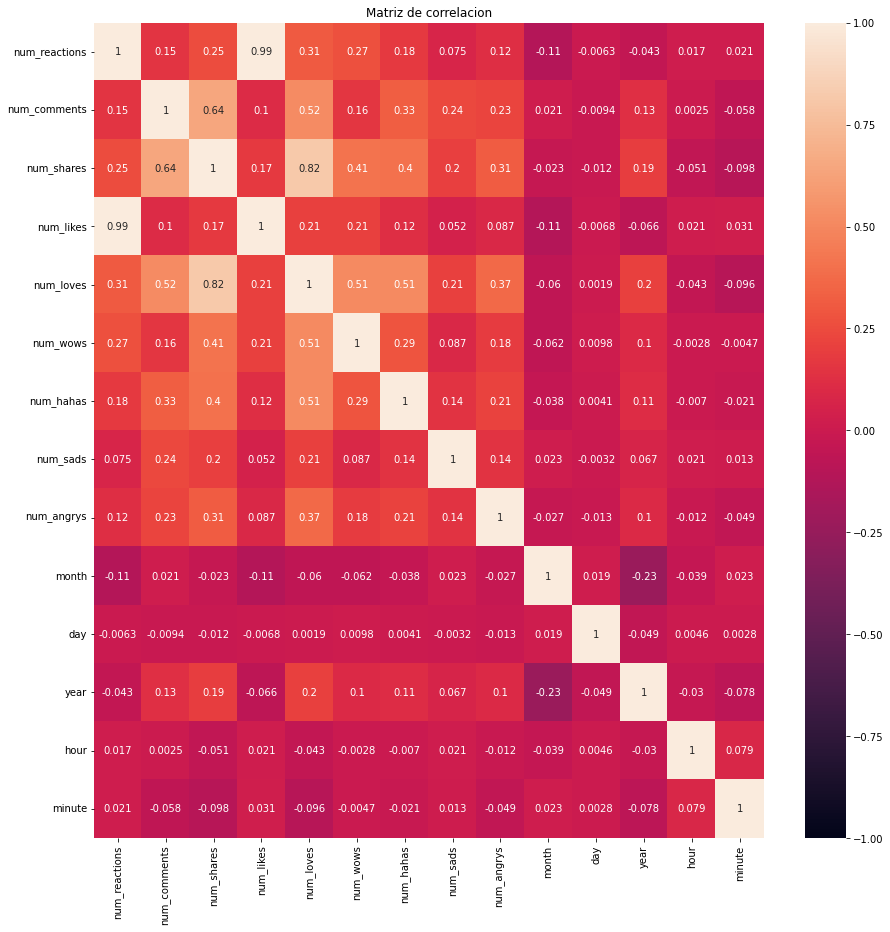

In [311]:
fig1 = plt.figure(figsize=(15,15))
df.corr()
plt.title('Matriz de correlacion')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True);#we can see loves, reaction, comments and year are strongly correlated

Drop the correlated features(se recomienda evitar tener características correlacionadas en un conjunto de datos, ya que un grupo de características altamente correlacionadas no aportará información adicional (o muy poca), pero aumentará la complejidad del algoritmo, aumentando así el riesgo de errores )

In [312]:
df = df.drop(['num_reactions', 'num_loves', 'year', 'num_comments'], axis=1)

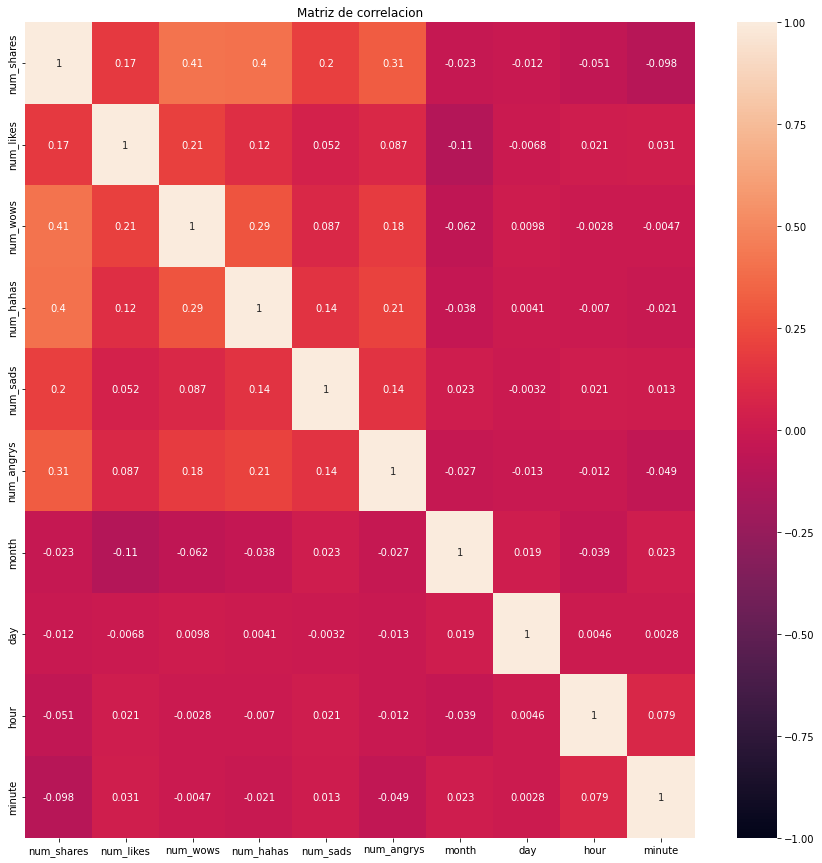

In [313]:
fig1 = plt.figure(figsize=(15,15))#plot again
df.corr()
plt.title('Matriz de correlacion')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True);

In [314]:
def DetecciondeOutliers(df): #creo una funcion para detectar outliers en las columnas numericas 

    avg, std = np.mean(df), np.std(df)
    #calculo un corte donde considerare que a partir de alli es un minimo o maximo
    corte = std * 3
    #establezco minimos y maximos
    min, max = avg - corte, avg + corte
    #creo 3 listas una contendra los outliers que estan por fuera del minimo establecido, del maximo y la cantidad de outliers en total 
    outliers_min = [x for x in df if x < min]
    outliers_max = [x for x in df if x > max]
    outliers_total = [x for x in df if x < min or x > max]

    # creo un array sin outliers
    sinoutliers = [x for x in df if x > min and x < max]
    
    print('outliers identificados por debajo del minimo: %d' % len(outliers_min)) 
    print('outliers identificados por encima del maximo: %d' % len(outliers_max)) 
    print('Total de outliers identificados: %d' % len(outliers_total)) 
    print('No poseen outlier: %d' % len(sinoutliers)) 
    print("porcentaje total de outliers: ", round((len(outliers_total) / len(sinoutliers) )*100, 4)) #aqui establezco el total de outliers y le digo que quiero visualizarlo con 4 decimales
    
    return

In [117]:
DetecciondeOutliers(df['num_likes'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 222
Total de outliers identificados: 222
No poseen outlier: 6828
porcentaje total de outliers:  3.2513


In [118]:
DetecciondeOutliers(df['num_hahas'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 66
Total de outliers identificados: 66
No poseen outlier: 6984
porcentaje total de outliers:  0.945


In [119]:
DetecciondeOutliers(df['num_shares'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 159
Total de outliers identificados: 159
No poseen outlier: 6891
porcentaje total de outliers:  2.3074


In [120]:
DetecciondeOutliers(df['num_sads'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 58
Total de outliers identificados: 58
No poseen outlier: 6992
porcentaje total de outliers:  0.8295


In [121]:
DetecciondeOutliers(df['num_angrys'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 76
Total de outliers identificados: 76
No poseen outlier: 6974
porcentaje total de outliers:  1.0898


In [122]:
DetecciondeOutliers(df['num_wows'])

outliers identificados por debajo del minimo: 0
outliers identificados por encima del maximo: 43
Total de outliers identificados: 43
No poseen outlier: 7007
porcentaje total de outliers:  0.6137


In [315]:
X = df
y = df['status_type']

In [123]:
#s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4} #label enoder
#df.status_type = [s_type[item] for item in df.status_type]

In [316]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [160]:
#df = df.drop(['hour', 'month'], axis=1)

In [317]:
df = df.drop('status_published', axis=1)


In [318]:
X = X.drop('status_published', axis=1)

###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [319]:
from sklearn.preprocessing import MinMaxScaler

min_scal = MinMaxScaler()

X = min_scal.fit_transform(X)

In [320]:
X = pd.DataFrame(X, columns=[df.columns])

In [127]:
#from sklearn.preprocessing import normalize#scale numerical data prior to modeling
#data_scaled = normalize(df)
#data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
#data_scaled.head() 

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,day,hour,minute
0,0.001977,0.518009,0.854122,0.005931,0.001977,0.001977,0.0,0.007909,0.043497,0.011863,0.000000
1,0.012532,0.000000,0.939889,0.000000,0.000000,0.000000,0.0,0.025064,0.131585,0.137850,0.281967
2,0.004680,0.266781,0.954794,0.004680,0.004680,0.000000,0.0,0.018721,0.098288,0.028082,0.079566
3,0.017133,0.000000,0.950874,0.000000,0.000000,0.000000,0.0,0.034266,0.179895,0.017133,0.248426
4,0.009707,0.000000,0.990093,0.000000,0.000000,0.000000,0.0,0.019414,0.087361,0.014560,0.106775


In [178]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

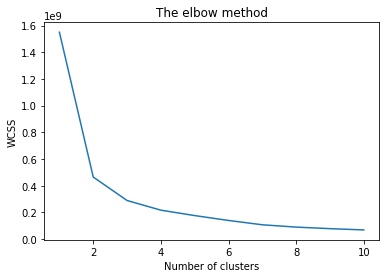

In [321]:
from sklearn import cluster, mixture # For clustering 

#Finding the optimum number of clusters for k-means classification

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show() #we can see is 2 the better number of clustering to elbow

In [180]:
# imports
from sklearn.decomposition import PCA
from matplotlib import pyplot as pl
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS

In [322]:
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))#we can see the best score is in 2 clusters

For n_clusters = 2, silhouette score is 0.8509216380242077)
For n_clusters = 3, silhouette score is 0.8014905249557525)
For n_clusters = 4, silhouette score is 0.6135383012293243)
For n_clusters = 5, silhouette score is 0.615084295323272)
For n_clusters = 6, silhouette score is 0.616022666144457)
For n_clusters = 7, silhouette score is 0.6609348607772484)
For n_clusters = 8, silhouette score is 0.6205551456481057)
For n_clusters = 9, silhouette score is 0.6165046005517649)


In [323]:
k_means = KMeans(n_clusters=2, random_state=42) 
predict_kmeans= k_means.fit_predict(X)
X['Clusters'] = k_means.fit_predict(X)

In [324]:
k_means.cluster_centers_

array([[3.41222443e-01, 7.51425849e-04, 4.04812456e-02, 2.47128110e-03,
        1.18907237e-03, 2.82342532e-03, 1.40562679e-03, 5.07993002e-01,
        5.05463393e-01, 3.56692921e-01, 5.02427467e-01],
       [9.74298142e-01, 3.12412233e-02, 5.49087066e-02, 8.51134039e-03,
        1.02404465e-02, 8.27266454e-03, 7.66591411e-03, 5.05409972e-01,
        4.70963490e-01, 3.11310537e-01, 4.02530645e-01]])

In [325]:
k_means.inertia_

2725.3078956789805

In [326]:
labels = k_means.labels_

In [327]:
correct_labels = sum(y == labels)

In [328]:
print("Result: {} out of {} samples were correctly labeled.".format(correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [143]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [329]:
def evaluation(predict):
    Rand = rand_score(y, predict)
    Adjusted_Rand = adjusted_rand_score(y, predict)
    print(f"Rand Score: {Rand:.5f}")
    print(f"Adjusted Rand Score: {Adjusted_Rand:.5f}")

In [330]:
evaluation(predict_kmeans)

Rand Score: 0.93971
Adjusted Rand Score: 0.87976


###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



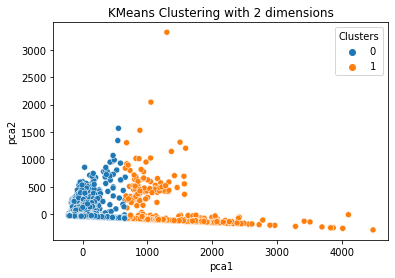

In [331]:
clustering_kmeans = KMeans(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

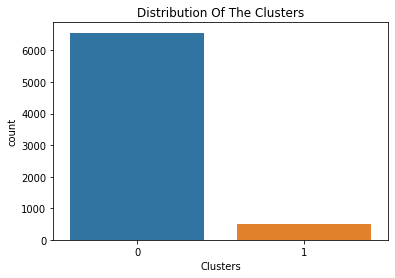

In [332]:
pl = sns.countplot(x=df["Clusters"])#see the distribution
pl.set_title("Distribution Of The Clusters")
plt.show()

In [333]:
df['Clusters'].value_counts()

0    6562
1     488
Name: Clusters, dtype: int64

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   day          7050 non-null   int64
 9   hour         7050 non-null   int64
 10  minute       7050 non-null   int64
 11  Clusters     7050 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 633.5 KB


In [334]:
df['Clusters'].value_counts(normalize=True) #we can fix this with downsample or undersample

0    0.93078
1    0.06922
Name: Clusters, dtype: float64

In [335]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [336]:
def downsample(df, label_col_name):
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [337]:
df_us = downsample(df, 'Clusters')

In [338]:
df_us['Clusters'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Clusters, dtype: float64

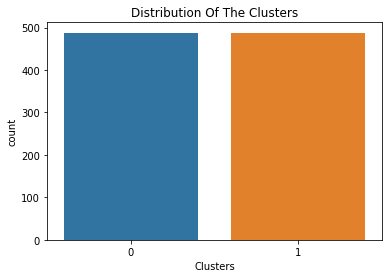

In [339]:
pl = sns.countplot(x=df_us["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

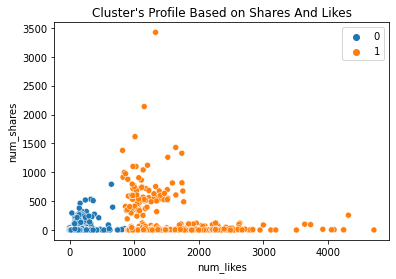

In [340]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_shares"], hue=df_us["Clusters"])
pl.set_title("Cluster's Profile Based on Shares And Likes")
plt.legend()
plt.show()

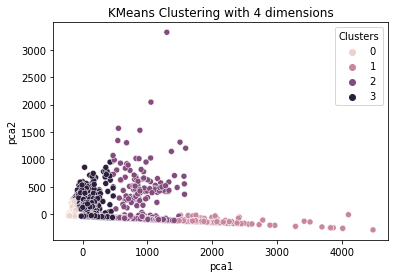

In [343]:
clustering_kmeans = KMeans(n_clusters=4)
df['Clusters'] = clustering_kmeans.fit_predict(df)
reduced_data4 = PCA(n_components=4).fit_transform(df)
results4 = pd.DataFrame(reduced_data4,columns=['pca1','pca2','pca3','pca4'])
sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('KMeans Clustering with 4 dimensions')
plt.show()

In [344]:
pca = PCA(n_components=4, whiten=True)
pca.fit(df)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.92134097, 0.99762398, 0.99901957, 0.99936647])